# __Dihedrals qualitative analysis__

### __Calculators definitions__

In [7]:
# ANI


# import the calculators
from torch import device
from torchani.models import ANI1x, ANI2x, ANI1ccx

ani1x_calc = ANI1x().ase()
ani1ccx_calc = ANI1ccx().ase()
ani2x_calc = ANI2x().ase()

# device type can defined via torch and parsed to the model via .to() method
#device_ = device('cpu')
#model_ = ANI1x(periodic_table_index=True).to(device_).double().ase()


# MACE
from mace.calculators import mace_mp, mace_off

macemp = mace_mp(
    model="medium", 
    dispersion=False, 
    default_dtype="float32", 
    device='cpu',
    )

maceoff = mace_off(
    model="medium", 
    device='cpu',
    default_dtype='float32'
    )

# ORB

from orb_models.forcefield.pretrained import orb_v2, orb_d3_v2
from orb_models.forcefield.calculator import ORBCalculator

orbff_v2 = orb_v2(device='cpu')
orb_calc_v2 = ORBCalculator(orbff_v2, device='cpu')

orbff_d3_v2 = orb_d3_v2(device='cpu')
orb_calc_d3_v2 = ORBCalculator(orbff_d3_v2, device='cpu')


CALC_NAME = 'ALL'

/Users/sergiortizropero/miniconda3/envs/ASE_all/lib/python3.10/site-packages/torchani/resources/
/Users/sergiortizropero/miniconda3/envs/ASE_all/lib/python3.10/site-packages/torchani/resources/
/Users/sergiortizropero/miniconda3/envs/ASE_all/lib/python3.10/site-packages/torchani/resources/
Using Materials Project MACE for MACECalculator with /Users/sergiortizropero/.cache/mace/20231203mace128L1_epoch199model
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.
Using MACE-OFF23 MODEL for MACECalculator with /Users/sergiortizropero/.cache/mace/MACE-OFF23_medium.model
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/Users/sergiortizropero/miniconda3/envs/ASE_all/lib/python3.10/site-packages/mace/calculators/mace.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_p

In [8]:
# define the calculators
calculator_list = [ani1x_calc, ani1ccx_calc, ani2x_calc, macemp, maceoff, orb_calc_v2, orb_calc_d3_v2]
calculator_names = ['ANI-1x', 'ANI-1ccx', 'ANI-2x', 'MACE-MP', 'MACE-OFF', 'ORB-V2', 'ORB-D3-V2']
calculator_colors = ['darkviolet', 'crimson', 'deeppink', 'darkgreen', 'mediumseagreen', 'royalblue', 'darkblue']

color_dict = {
    'ANI-1x': 'darkviolet', 
    'ANI-1ccx': 'crimson', 
    'ANI-2x': 'deeppink', 
    'MACE-MP': 'darkgreen', 
    'MACE-OFF':  'mediumseagreen', 
    'ORB-V2': 'royalblue', 
    'ORB-D3-V2': 'darkblue',
}

## __General imports__

In [9]:
#=======================#
#       EXAMPLES        #
#=======================#

# mol_name = 'ethane'
# ethane = build.molecule('C2H6')
# dihedral_ids = [2, 0, 1, 6]
# mask = [0, 1, 0, 0, 0, 1, 1, 1]

# mol_name = 'fluoropropadiene'
# molecule = pubchem_atoms_search(smiles='FC=C=C')
# dihedral_ids = [4, 1, 2, 3]
# bond_ids = [1, 2]
# mask = [0, 0, 1, 1, 0, 1, 1, 1]

# mol_name = 'biphenyl'
# molecule = pubchem_atoms_search(smiles='C1=CC=C(C=C1)C2=CC=CC=C2')
# dihedral_symbol = 'CCCC'
# bond_ids = [0, 1]
# dihedral_ids = [2, 0, 1, 3]
# mask = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

# mol_name = 'mol_25'
# molecule = pubchem_atoms_search(smiles='C1=CC(=O)NC(=C1)C2=CC=CO2')
# dihedral_symbol = 'OCCN'
# bond_ids = [4, 3]
# dihedral_ids = [0, 4, 3, 2]
# mask = [0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,]

# mol_name = 'mol_76'
# molecule = pubchem_atoms_search(smiles='C1=CNC2=NC=NC(=C21)C3=CNN=C3')
# dihedral_symbol = 'CCCC'
# bond_ids = [8, 6]
# dihedral_ids = [12, 8, 6, 5]
# mask = [1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0]

# mol_name = 'mol_23'
# molecule = pubchem_atoms_search(smiles='C1=CC(=O)NC(=C1)C2=COC=C2')
# dihedral_symbol = 'NCCC'
# bond_ids = [4, 3]
# dihedral_ids = [7, 4, 3, 2]
# mask = [0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0]

In [10]:
# general imports
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('lines', lw=1, color='b')
rc('legend', loc='best')
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.edgecolor"] = 'black'
plt.rcParams['legend.borderpad'] = 0.25
plt.rcParams['legend.fontsize'] = 11
plt.rcParams.update({'pgf.preamble': r'\usepackage{amsmath}'})

from ase import Atoms
from ase.visualize import view
from ase.build import molecule
from ase.io import write, read
from ase.io import Trajectory, trajectory
from ase.visualize import view
from ase.io import trajectory, write
from ase import build
from ase.data.pubchem import pubchem_atoms_search

In [11]:
def evaluate_dihedral(molecule, dihedral_ids, mask,  calculator_list, resolution=None, mol_name='', visualize=True):
    '''
    Definition
    ----------
    Evaluates the PES of a rotatble bond rotation.
    
    dihedral_ids contain the atoms that form the dihedral
    resolution in angles of the scan (0 to 360), 1, 5, 10, 20, 40, 50, ...

    greate a dir with the conformers for reproducibility and its result
    '''

    # create the working directory
    work_dir = os.path.join(os.curdir, 'PES_dihedrals', mol_name)
    if not os.path.isdir(work_dir):
        os.makedirs(work_dir)

    # define the number of conformers to generate
    points = int(360 / resolution)
    #if type(points) != int:
    #    print('THE RESOLUTION IS NOT COMPATIBLE! SHOULD DIVIDE 360.')
    print(f'performing {resolution} degree dihedral scan')
    dihedral_list = np.linspace(0., 360., points+1)

   
    # save the conformers to disk for reproducibility
    print(f'saving {points} conformers')
    for i in range(len(dihedral_list)):
        molecule.set_dihedral(dihedral_ids[0], dihedral_ids[1], dihedral_ids[2], dihedral_ids[3], angle=dihedral_list[i], mask=mask)
        write(os.path.join(work_dir, f'conf_{i}.xyz'), molecule)


    # create a trajectory file for the scan (one calculator only)
    if len(calculator_list) == 1:
        traj_path = os.path.join(work_dir, 'dihedral_scan.traj')
        traj = trajectory.TrajectoryWriter(filename=traj_path, mode='w')

    # compute the dihedrals
    print(f'computing {molecule[dihedral_ids[0]].symbol}{molecule[dihedral_ids[0]].index}-{molecule[dihedral_ids[1]].symbol}{molecule[dihedral_ids[1]].index}-{molecule[dihedral_ids[2]].symbol}{molecule[dihedral_ids[2]].index}-{molecule[dihedral_ids[3]].symbol}{molecule[dihedral_ids[3]].index} PES')
    print(f'evaluating {len(dihedral_list)} conformers')
    print(f'dihedrals:\n{dihedral_list}\n')

    # save energies
    energies = []

    # save successful calculators
    succ_calcs = []

    # evaluate each calculator
    k = 0
    for calc_ in calculator_list: 
        k += 1

        try:
            calc_energy_list = []

            for d in dihedral_list:

                # define the configuration
                molecule.set_dihedral(dihedral_ids[0], dihedral_ids[1], dihedral_ids[2], dihedral_ids[3], angle=d, mask=mask)
                molecule.calc = calc_
                potential_e = molecule.get_potential_energy()
                calc_energy_list.append(potential_e)
            
                if len(calculator_list) == 1:
                    traj.write(molecule)

            # compute reference
            # TODO

            energies.append(calc_energy_list)
            succ_calcs.append(calculator_names[k-1])

        except: print(f'something went wrong with calculator {calc_}')

        if len(calculator_list) == 1:
            traj.close()
    
    if visualize:
        if len(calculator_list) == 1:
            traj = trajectory.TrajectoryReader(os.path.join('./', mol_name, 'dihedral_scan.traj'))
            view(traj, viewer='ase')

    return dihedral_list, energies, succ_calcs



def plot_dihedral(dihedral_list, energy_list, calculator_names, color_dict, mol_name='', calc_name='', dihedral_symbol='', plot_markers=False):
    '''
    Plot a dihedral scan. 
    '''

    work_dir = os.path.join(os.curdir, 'PES_dihedrals', mol_name)

    if plot_markers:
        _color_list = ['black', 'red', 'orange', 'blue']
        _marker_list = ['^', 'd', 'v', 'o']

    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(6,4)) 
    axes.tick_params(bottom=True, top=True, left=True, right=False, direction="in")
    axes.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False, direction="in")

    for k in range(len(calculator_names)):
        
        # gather the minimum energy structure
        idx = np.argmin(energy_list[k][:])
        min_energy = energy_list[k][idx]
        min_dih = dihedral_list[idx]

        # TODO convert energy from eV/particle to kcal/mol: 1 eV/molecule = 23.0605 kcal/mol
        # IMPORTANT MACE MODELS DO NOT HAVE THE SAME 

        axes.plot(dihedral_list, (np.array(energy_list[k][:])-min_energy), label=r'$\textnormal{' + calculator_names[k] + r'}$', color=color_dict[calculator_names[k]], alpha=0.9)
        if plot_markers:
            axes.scatter(min_dih, min_energy-min_energy, color=_color_list[k], marker=_marker_list[k], label=r'$\textnormal{energy ref @ ' + f'{min_dih:.0f}' + r' deg}$')

    # add a text to the plot with the name of the molecule on the top right

    axes.set(xlabel=r'$\textnormal{' + f'{mol_name} {dihedral_symbol}' + r' dihedral angle}\;\textnormal{(deg)}$', ylabel=r'$\textnormal{potential energy}\;\textnormal{(eV)}$')
    #r'$\textnormal{' + f'{mol_name}' + r'}$'
    #axes.text(.03, .97, f'{mol_name}', ha='left', va='top', transform=axes.transAxes, size='large', weight='bold')
    axes.legend(loc='best', title=f'{mol_name}', title_fontsize='large', prop={'size': 9})

    plt.tight_layout()
    plt.savefig(os.path.join(work_dir, f'{mol_name}_{dihedral_symbol}_dihedral_{calc_name}'+'_PES.png'), dpi=400)
    plt.show(fig)

### __Testing site__

In [ ]:
from mace.calculators import mace_mp, mace_off

maceoff = mace_off(
    model="medium", 
    device='cpu',
    default_dtype='float64'
    )

calculator_list = [maceoff]
calculator_names = ['MACE-OFF']

Using MACE-OFF23 MODEL for MACECalculator with /Users/sergiortizropero/.cache/mace/MACE-OFF23_medium.model
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.


/Users/sergiortizropero/miniconda3/envs/ASE_all/lib/python3.10/site-packages/mace/calculators/mace.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_p

In [ ]:
#molecule = build.molecule('C2H6')
#molecule = pubchem_atoms_search(name='ethane')

#======================#
#       TEST SITE      #
#======================#

# define the molecule
mol_name = 'mol_23'
molecule = pubchem_atoms_search(smiles='C1=CC(=O)NC(=C1)C2=COC=C2')

for atom in molecule:
    print(atom.index, atom.symbol)
view(molecule, viewer='ase')

dihedral_symbol = 'NCCC'
bond_ids = [4, 3]
dihedral_ids = [7, 4, 3, 2]

# TODO CREATE THE MASK AUTOMATICALLY with neighbour list....
mask = [0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0]
print(len(mask))

molecule.set_dihedral(dihedral_ids[0], dihedral_ids[1], dihedral_ids[2], dihedral_ids[3], 90, mask=mask)
#view(molecule, viewer='ase')

0 O
1 O
2 N
3 C
4 C
5 C
6 C
7 C
8 C
9 C
10 C
11 C
12 H
13 H
14 H
15 H
16 H
17 H
18 H
19


/Users/sergiortizropero/miniconda3/envs/ASE_all/lib/python3.10/site-packages/ase/data/pubchem.py:80: UserWarning: The structure "C1=CC(=O)NC(=C1)C2=COC=C2" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function
  warnings.warn(


performing 10 degree dihedral scan
saving 36 conformers
computing C7-C4-C3-N2 PES
evaluating 37 conformers
dihedrals:
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200. 210. 220. 230. 240. 250. 260. 270.
 280. 290. 300. 310. 320. 330. 340. 350. 360.]



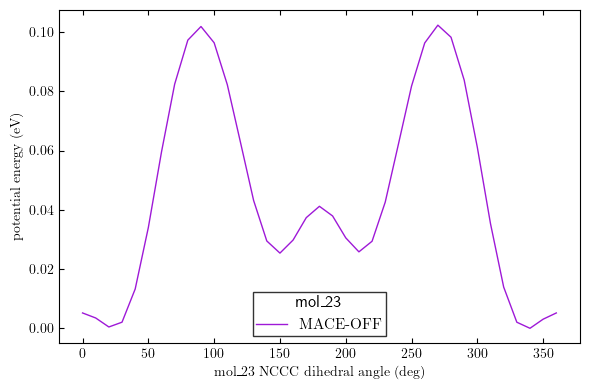

In [ ]:
dihedrals, energies, succ_calcs = evaluate_dihedral(molecule, dihedral_ids, mask,  calculator_list, resolution=10, mol_name=mol_name, visualize=False)
plot_dihedral(dihedrals, energies, succ_calcs, color_dict, mol_name=mol_name, dihedral_symbol=dihedral_symbol)

In [ ]:
traj = trajectory.TrajectoryReader(os.path.join('./', mol_name, 'dihedral_scan.traj'))
view(traj, viewer='ase')

<Popen: returncode: None args: ['/Users/sergiortizropero/miniconda3/envs/ASE...>

## __ALL EXAMPLES__

performing 2 degree dihedral scan
saving 180 conformers
computing H2-C0-C1-H6 PES
evaluating 181 conformers
dihedrals:
[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138.
 140. 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 166.
 168. 170. 172. 174. 176. 178. 180. 182. 184. 186. 188. 190. 192. 194.
 196. 198. 200. 202. 204. 206. 208. 210. 212. 214. 216. 218. 220. 222.
 224. 226. 228. 230. 232. 234. 236. 238. 240. 242. 244. 246. 248. 250.
 252. 254. 256. 258. 260. 262. 264. 266. 268. 270. 272. 274. 276. 278.
 280. 282. 284. 286. 288. 290. 292. 294. 296. 298. 300. 302. 304. 306.
 308. 310. 312. 314. 316. 318. 320. 322. 324. 326. 328. 330. 332. 334.
 336. 338. 340. 342. 344. 346

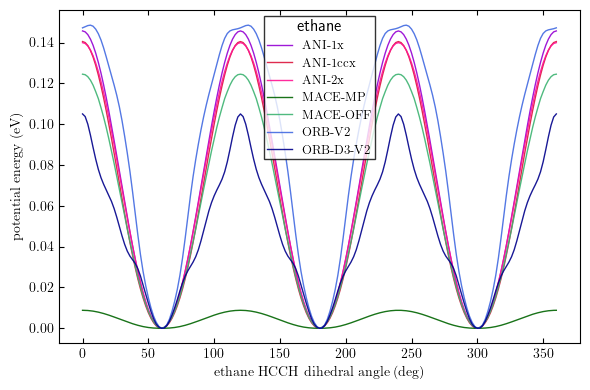

In [13]:
# define the molecule
mol_name = 'ethane'
molecule = build.molecule('C2H6')

# parameters
dihedral_symbol = 'HCCH'
bond_ids = [0, 1]
dihedral_ids = [2, 0, 1, 6]
mask = [0, 1, 0, 0, 0, 1, 1, 1]

# perform the scan
dihedrals, energies, succ_calcs = evaluate_dihedral(molecule, dihedral_ids, mask,  calculator_list, resolution=2, mol_name=mol_name, visualize=False)
plot_dihedral(dihedrals, energies, succ_calcs, color_dict, mol_name=mol_name, dihedral_symbol=dihedral_symbol, calc_name=CALC_NAME)


performing 2 degree dihedral scan
saving 180 conformers
computing H4-C1-C2-C3 PES
evaluating 181 conformers
dihedrals:
[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138.
 140. 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 166.
 168. 170. 172. 174. 176. 178. 180. 182. 184. 186. 188. 190. 192. 194.
 196. 198. 200. 202. 204. 206. 208. 210. 212. 214. 216. 218. 220. 222.
 224. 226. 228. 230. 232. 234. 236. 238. 240. 242. 244. 246. 248. 250.
 252. 254. 256. 258. 260. 262. 264. 266. 268. 270. 272. 274. 276. 278.
 280. 282. 284. 286. 288. 290. 292. 294. 296. 298. 300. 302. 304. 306.
 308. 310. 312. 314. 316. 318. 320. 322. 324. 326. 328. 330. 332. 334.
 336. 338. 340. 342. 344. 346

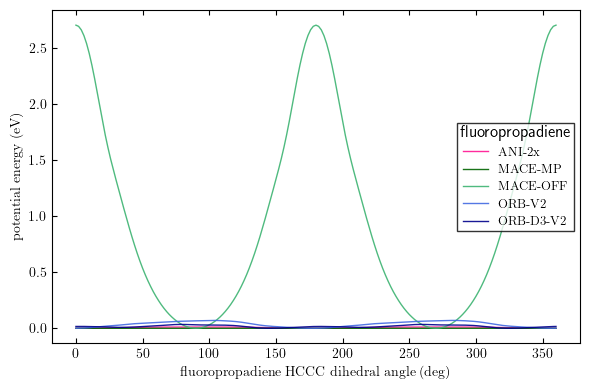

In [19]:
mol_name = 'fluoropropadiene'
molecule = pubchem_atoms_search(smiles='FC=C=C')
dihedral_symbol = 'HCCC'
bond_ids = [1, 2]
dihedral_ids = [4, 1, 2, 3]
mask = [0, 0, 1, 1, 0, 1, 1, 1]

# perform the scan
dihedrals, energies, succ_calcs = evaluate_dihedral(molecule, dihedral_ids, mask,  calculator_list, resolution=2, mol_name=mol_name, visualize=False)
plot_dihedral(dihedrals, energies, succ_calcs, color_dict, mol_name=mol_name, dihedral_symbol=dihedral_symbol, calc_name=CALC_NAME)

performing 2 degree dihedral scan
saving 180 conformers
computing C2-C0-C1-C3 PES
evaluating 181 conformers
dihedrals:
[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138.
 140. 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 166.
 168. 170. 172. 174. 176. 178. 180. 182. 184. 186. 188. 190. 192. 194.
 196. 198. 200. 202. 204. 206. 208. 210. 212. 214. 216. 218. 220. 222.
 224. 226. 228. 230. 232. 234. 236. 238. 240. 242. 244. 246. 248. 250.
 252. 254. 256. 258. 260. 262. 264. 266. 268. 270. 272. 274. 276. 278.
 280. 282. 284. 286. 288. 290. 292. 294. 296. 298. 300. 302. 304. 306.
 308. 310. 312. 314. 316. 318. 320. 322. 324. 326. 328. 330. 332. 334.
 336. 338. 340. 342. 344. 346

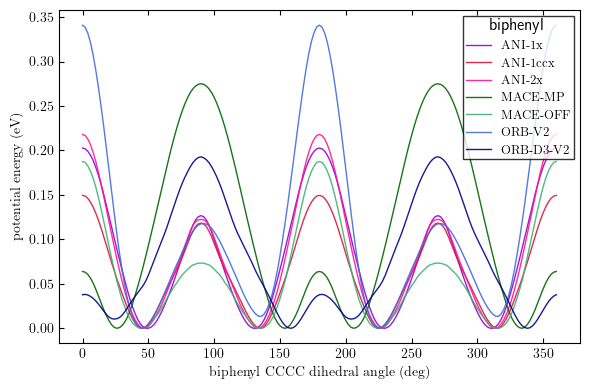

In [20]:
mol_name = 'biphenyl'
molecule = pubchem_atoms_search(smiles='C1=CC=C(C=C1)C2=CC=CC=C2')
dihedral_symbol = 'CCCC'
bond_ids = [0, 1]
dihedral_ids = [2, 0, 1, 3]
mask = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

dihedrals, energies, succ_calcs = evaluate_dihedral(molecule, dihedral_ids, mask,  calculator_list, resolution=2, mol_name=mol_name, visualize=False)
plot_dihedral(dihedrals, energies, succ_calcs, color_dict, mol_name=mol_name, dihedral_symbol=dihedral_symbol, calc_name=CALC_NAME)

performing 2 degree dihedral scan
saving 180 conformers
computing O0-C4-C3-N2 PES
evaluating 181 conformers
dihedrals:
[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138.
 140. 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 166.
 168. 170. 172. 174. 176. 178. 180. 182. 184. 186. 188. 190. 192. 194.
 196. 198. 200. 202. 204. 206. 208. 210. 212. 214. 216. 218. 220. 222.
 224. 226. 228. 230. 232. 234. 236. 238. 240. 242. 244. 246. 248. 250.
 252. 254. 256. 258. 260. 262. 264. 266. 268. 270. 272. 274. 276. 278.
 280. 282. 284. 286. 288. 290. 292. 294. 296. 298. 300. 302. 304. 306.
 308. 310. 312. 314. 316. 318. 320. 322. 324. 326. 328. 330. 332. 334.
 336. 338. 340. 342. 344. 346

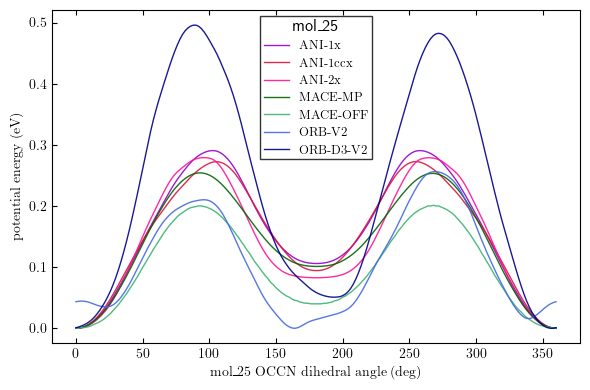

In [21]:
mol_name = 'mol_25'
molecule = pubchem_atoms_search(smiles='C1=CC(=O)NC(=C1)C2=CC=CO2')
dihedral_symbol = 'OCCN'
bond_ids = [4, 3]
dihedral_ids = [0, 4, 3, 2]
mask = [0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,]

dihedrals, energies, succ_calcs = evaluate_dihedral(molecule, dihedral_ids, mask,  calculator_list, resolution=2, mol_name=mol_name, visualize=False)
plot_dihedral(dihedrals, energies, succ_calcs, color_dict, mol_name=mol_name, dihedral_symbol=dihedral_symbol, calc_name=CALC_NAME)

performing 2 degree dihedral scan
saving 180 conformers
computing C12-C8-C6-C5 PES
evaluating 181 conformers
dihedrals:
[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138.
 140. 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 166.
 168. 170. 172. 174. 176. 178. 180. 182. 184. 186. 188. 190. 192. 194.
 196. 198. 200. 202. 204. 206. 208. 210. 212. 214. 216. 218. 220. 222.
 224. 226. 228. 230. 232. 234. 236. 238. 240. 242. 244. 246. 248. 250.
 252. 254. 256. 258. 260. 262. 264. 266. 268. 270. 272. 274. 276. 278.
 280. 282. 284. 286. 288. 290. 292. 294. 296. 298. 300. 302. 304. 306.
 308. 310. 312. 314. 316. 318. 320. 322. 324. 326. 328. 330. 332. 334.
 336. 338. 340. 342. 344. 34

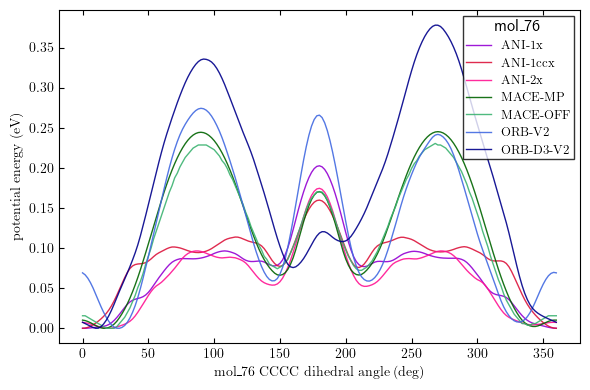

In [22]:
mol_name = 'mol_76'
molecule = pubchem_atoms_search(smiles='C1=CNC2=NC=NC(=C21)C3=CNN=C3')
dihedral_symbol = 'CCCC'
bond_ids = [8, 6]
dihedral_ids = [12, 8, 6, 5]
mask = [1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0]

dihedrals, energies, succ_calcs = evaluate_dihedral(molecule, dihedral_ids, mask,  calculator_list, resolution=2, mol_name=mol_name, visualize=False)
plot_dihedral(dihedrals, energies, succ_calcs, color_dict, mol_name=mol_name, dihedral_symbol=dihedral_symbol, calc_name=CALC_NAME)

performing 2 degree dihedral scan
saving 180 conformers
computing C7-C4-C3-N2 PES
evaluating 181 conformers
dihedrals:
[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138.
 140. 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 166.
 168. 170. 172. 174. 176. 178. 180. 182. 184. 186. 188. 190. 192. 194.
 196. 198. 200. 202. 204. 206. 208. 210. 212. 214. 216. 218. 220. 222.
 224. 226. 228. 230. 232. 234. 236. 238. 240. 242. 244. 246. 248. 250.
 252. 254. 256. 258. 260. 262. 264. 266. 268. 270. 272. 274. 276. 278.
 280. 282. 284. 286. 288. 290. 292. 294. 296. 298. 300. 302. 304. 306.
 308. 310. 312. 314. 316. 318. 320. 322. 324. 326. 328. 330. 332. 334.
 336. 338. 340. 342. 344. 346

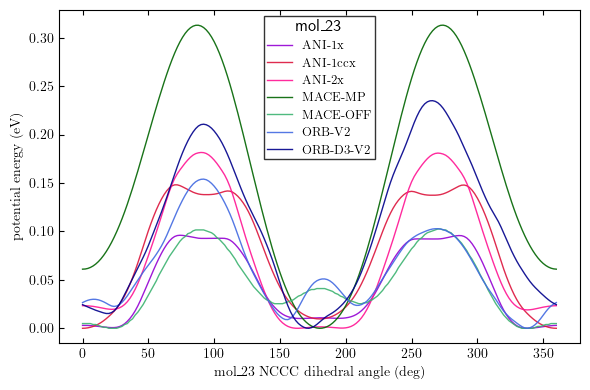

In [23]:
mol_name = 'mol_23'
molecule = pubchem_atoms_search(smiles='C1=CC(=O)NC(=C1)C2=COC=C2')
dihedral_symbol = 'NCCC'
bond_ids = [4, 3]
dihedral_ids = [7, 4, 3, 2]
mask = [0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0]

dihedrals, energies, succ_calcs = evaluate_dihedral(molecule, dihedral_ids, mask,  calculator_list, resolution=2, mol_name=mol_name, visualize=False)
plot_dihedral(dihedrals, energies, succ_calcs, color_dict, mol_name=mol_name, dihedral_symbol=dihedral_symbol, calc_name=CALC_NAME)